# Visualize the MS-SMC' likelihood surface

In [1]:
import toytree
import ipcoal
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [2]:
RECOMB = 2e-9
SEED = 12345
NEFF = 200_000
ROOT_HEIGHT = 1e6
NSPECIES = 2
NSAMPLES = 4
NSITES = 1e5
NLOCI = 100

## Simulate ARGs on a 2-population model

In [3]:
sptree = toytree.rtree.baltree(NSPECIES).mod.edges_scale_to_root_height(ROOT_HEIGHT, include_stem=True)
sptree.draw(ts='c');

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t36fcee8764784c528b1dfdf6158e158b"> r0 r1 0 500000 1000000

In [4]:
model = ipcoal.Model(sptree, Ne=NEFF, nsamples=NSAMPLES, recomb=RECOMB, seed_trees=SEED)

In [5]:
model.sim_trees(NLOCI, NSITES)

In [6]:
imap = model.get_imap_dict()

### Get genealogies at tree-change and topology-change events

In [7]:
# genealogy tree change interval lengths
tree_lengths = model.df.nbps.values

# N and avg tree change length
print(f"{len(tree_lengths)} genealogies w/ average length={np.mean(tree_lengths):.0f}")

59117 genealogies w/ average length=169


In [13]:
mtree = toytree.mtree(model.df.genealogy[:50])
mtree.draw();

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="750.0px" height="250.0px" viewBox="0 0 750.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tc9dcdc283c1545bfab3572237d06d933"> r1_1 r1_3 r1_0 r1_2 r0_2 r0_0 r0_1 r0_3 r0_2 r0_0 r0_1 r0_3 r1_1 r1_3 r1_0 r1_2 r0_2 r0_0 r0_1 r0_3 r1_1 r1_3 r1_0 r1_2 r0_2 r0_0 r0_1 r0_3 r1_2 r1_0 r1_1 r1_3

In [14]:
# genealogy tree change interval lengths
tree_lengths = model.df.nbps.values

# N and avg tree change length
print(f"{len(tree_lengths)} genealogies w/ average length={np.mean(tree_lengths):.0f}")

59117 genealogies w/ average length=169


In [11]:
# genealogy topo change interval lengths
#topo_lengths = ipcoal.smc.likelihood.get_topology_interval_lengths(model)

# N and avg tree change length
print(f"{len(topo_lengths)} genealogy topologies w/ average length={np.mean(topo_lengths):.0f}")

21190 genealogy topologies w/ average length=472


In [58]:
# genealogy topo change interval lengths
topo_lengths = ipcoal.smc.likelihood.get_topology_interval_lengths(model)

# N and avg tree change length
print(f"{len(topo_lengths)} genealogy topologies w/ average length={np.mean(topo_lengths):.0f}")

25446 genealogy topologies w/ average length=393


In [16]:
# load all genealogies as Toytrees
genealogies = toytree.mtree(model.df.genealogy[:4])

# example genealogy
genealogies.draw(scale_bar=True);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="750.0px" height="250.0px" viewBox="0 0 750.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t3743b51d6ec748f28467a06da5d99335"> r1_1 r1_3 r1_0 r1_2 r0_2 r0_0 r0_1 r0_3 800000 400000 0 r0_2 r0_0 r0_1 r0_3 r1_1 r1_3 r1_0 r1_2 800000 400000 0 r0_2 r0_0 r0_1 r0_3 r1_1 r1_3 r1_0 r1_2 800000 400000 0 r0_2 r0_0 r0_1 r0_3 r1_2 r1_0 r1_1 r1_3 800000 400000 0

### Get embedding tables

In [18]:
gdata = ipcoal.smc.TreeEmbedding(model.tree, model.df.genealogy, imap)

AttributeError: 'TreeEmbedding' object has no attribute 'table'

In [61]:
tdata = ipcoal.smc.TreeEmbedding(model.tree, model.df.genealogy, imap)

,start,stop,st_node,neff,nedges,dist,gindex,0,1,2,...,5,6,7,8,9,10,11,12,13,14
100,0.000000,165552.050383,0,200000,4,165552.050383,10,0,0,0,...,1,1,1,0,0,0,0,0,0,0
101,165552.050383,166956.245877,0,200000,3,1404.195494,10,0,0,0,...,1,0,0,0,0,1,0,0,0,0
102,166956.245877,169403.470873,0,200000,2,2447.224996,10,0,0,0,...,0,0,0,0,0,0,1,0,0,0
103,169403.470873,500000.0,0,200000,1,330596.529127,10,0,0,0,...,0,0,0,0,0,0,0,1,0,0
104,0.000000,5339.012161,1,200000,4,5339.012161,10,1,1,1,...,0,0,0,0,0,0,0,0,0,0
105,5339.012161,39935.352168,1,200000,3,34596.340007,10,1,1,0,...,0,0,0,1,0,0,0,0,0,0
106,39935.352168,500000.0,1,200000,2,460064.647832,10,1,0,0,...,0,0,0,0,1,0,0,0,0,0
107,500000.000000,600215.02551,2,200000,3,100215.02551,10,1,0,0,...,0,0,0,0,1,0,0,1,0,0
108,600215.025510,983437.186931,2,200000,2,383222.161421,10,1,0,0,...,0,0,0,0,0,0,0,0,1,0
109,983437.186931,1000000000000,2,200000,1,1000000000000,10,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### GRID

In [62]:
np.linspace(10_000, 400_000, 31)

array([ 10000.,  23000.,  36000.,  49000.,  62000.,  75000.,  88000.,
       101000., 114000., 127000., 140000., 153000., 166000., 179000.,
       192000., 205000., 218000., 231000., 244000., 257000., 270000.,
       283000., 296000., 309000., 322000., 335000., 348000., 361000.,
       374000., 387000., 400000.])

In [63]:
np.linspace(1e-9, 10e-9, 31)

array([1.0e-09, 1.3e-09, 1.6e-09, 1.9e-09, 2.2e-09, 2.5e-09, 2.8e-09,
       3.1e-09, 3.4e-09, 3.7e-09, 4.0e-09, 4.3e-09, 4.6e-09, 4.9e-09,
       5.2e-09, 5.5e-09, 5.8e-09, 6.1e-09, 6.4e-09, 6.7e-09, 7.0e-09,
       7.3e-09, 7.6e-09, 7.9e-09, 8.2e-09, 8.5e-09, 8.8e-09, 9.1e-09,
       9.4e-09, 9.7e-09, 1.0e-08])

In [64]:
def get_likelihood_surface(
    topology: bool,
    embedding: ipcoal.smc.likelihood.Embedding,
    lengths: np.ndarray,
    min_neff: int = 10_000,
    max_neff: int = 400_000,
    min_recomb: float = 0.1e-9,
    max_recomb: float = 10e-9,
    n_values: int=21,
    #n_recomb_values: int=11,
    ):
    """Return an array of log likelihood scores for a grid of parameters.
    
    """
    neffs = np.linspace(min_neff, max_neff, n_values)
    recos = np.linspace(min_recomb, max_recomb, n_values)
    X, Y = np.meshgrid(neffs, recos)
    Z = np.zeros(X.shape)
       
    for i, neff in enumerate(neffs):
        
        ipcoal.smc.likelihood.ms_smc_jit._update_neffs(embedding.earr, np.array([neff, neff, neff]))
        if topology:
            earr, barr, sarr, rarr = embedding.get_data()
            rates = ipcoal.smc.likelihood.ms_smc_jit.get_fast_waiting_distance_to_topology_change_rates(earr, barr, sarr, rarr, 1)
        else:
            earr, barr, sarr = embedding.get_data()
            rates = ipcoal.smc.likelihood.ms_smc_jit.get_fast_waiting_distance_to_tree_change_rates(earr, barr, sarr, 1)

        for j, rec in enumerate(recos):
            lambdas = rates * rec         
            Z[i, j] = -np.sum(stats.expon.logpdf(scale=1/lambdas, x=lengths))
            #print(f"{i}\t{j}\t{neff:.0f}\t{rec:1.2g}\t{Z[i,j]:.0f}")
    return X, Y, Z

In [65]:
def get_combined_likelihood_surface(
    tree_embedding: ipcoal.smc.likelihood.TreeEmbedding,
    topo_embedding: ipcoal.smc.likelihood.TreeEmbedding,
    tree_lengths: np.ndarray,
    topo_lengths: np.ndarray,
    min_neff: int = 10_000,
    max_neff: int = 400_000,
    min_recomb: float = 0.1e-9,
    max_recomb: float = 10e-9,
    n_values: int=21,
    #n_recomb_values: int=11,
    ):
    """Return an array of log likelihood scores for a grid of parameters.
    
    """
    neffs = np.linspace(min_neff, max_neff, n_values)
    recos = np.linspace(min_recomb, max_recomb, n_values)
    X, Y = np.meshgrid(neffs, recos)
    Z = np.zeros(X.shape)
       
    for i, neff in enumerate(neffs):
        
        ipcoal.smc.likelihood.ms_smc_jit._update_neffs(tree_embedding.earr, np.array([neff, neff, neff]))
        ipcoal.smc.likelihood.ms_smc_jit._update_neffs(topo_embedding.earr, np.array([neff, neff, neff]))

        earr, barr, sarr, rarr = topo_embedding.get_data()
        topo_rates = ipcoal.smc.likelihood.ms_smc_jit.get_fast_waiting_distance_to_topology_change_rates(earr, barr, sarr, rarr, 1)
        
        earr, barr, sarr = tree_embedding.get_data()
        tree_rates = ipcoal.smc.likelihood.ms_smc_jit.get_fast_waiting_distance_to_tree_change_rates(earr, barr, sarr, 1)

        for j, rec in enumerate(recos):
            topo_lambdas = topo_rates * rec    
            tree_lambdas = tree_rates * rec
            topo_loglik = -np.sum(stats.expon.logpdf(scale=1/topo_lambdas, x=topo_lengths))
            tree_loglik = -np.sum(stats.expon.logpdf(scale=1/tree_lambdas, x=tree_lengths))
            Z[i, j] = topo_loglik + tree_loglik
            #print(f"{i}\t{j}\t{neff:.0f}\t{rec:1.2g}\t{Z[i,j]:.0f}")
    return X, Y, Z

In [66]:
def plot_likelihood_surface(x, y, z, levels=20, title="", vmin=None):
    fig, ax = plt.subplots()
    cs = ax.contourf(x, y, -z, levels=levels, cmap='viridis', vmin=vmin, linestyles='solid')
    ma = ax.scatter(NEFF, RECOMB, marker="x", s=50)
    cbar = fig.colorbar(cs, label="log likelihood")
    ax.set_ylabel('Recombination rate (r)', fontsize=16)
    ax.set_xlabel('Diploid N$_e$', fontsize=16);
    ax.set_xticks([200_000, 400_000, 600_000, 800_000])
    ax.set_title(title, fontsize=16, pad=15)
    return fig, ax, (cs, ma, cbar)

## Calculate combined information likelihood

In [69]:
cx, cy, cz = get_combined_likelihood_surface(
    min_neff=50_000, max_neff=800_000, n_values=41,
    min_recomb=1e-9, max_recomb=3e-9,
    tree_embedding=gdata, 
    tree_lengths=tree_lengths,
    topo_embedding=tdata,
    topo_lengths=topo_lengths,
)

### Plot combined info likelihood surface

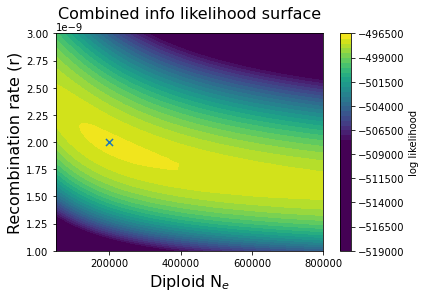

In [75]:
fig, _, _ = plot_likelihood_surface(
    cx, cy, cz.T, 
    levels=50, 
    vmin=-cz.max() + (cz.max() - cz.min()) / 2,
    title="Combined info likelihood surface",
);
#fig.savefig('../manuscript/figures/likelihood-surface-combined-final.jpg')
#fig.savefig('../manuscript/figures/likelihood-surface-combined-final.svg')

### Topology distance likelihood surface

In [72]:
tx, ty, tz = get_likelihood_surface(
    min_neff=50_000, max_neff=800_000, n_values=41,
    min_recomb=1e-9, max_recomb=3e-9,
    topology=True, 
    embedding=tdata, 
    lengths=topo_lengths)

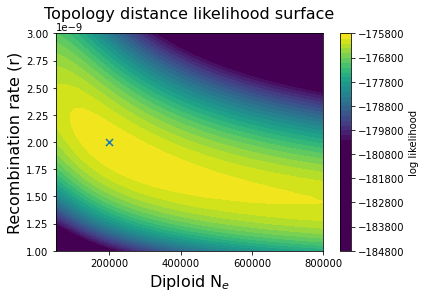

In [77]:
fig, _, _ = plot_likelihood_surface(
    tx, ty, tz.T,
    levels=50, 
    vmin=-tz.max() + (tz.max() - tz.min()) / 2,
    title="Topology distance likelihood surface",
);
#fig.savefig('../manuscript/figures/likelihood-surface-topodist-final.jpg')
#fig.savefig('../manuscript/figures/likelihood-surface-topodist-final.svg')

### Tree distance likelihood surface

In [78]:
gx, gy, gz = get_likelihood_surface(
    min_neff=50_000, max_neff=800_000, n_values=41,
    min_recomb=1e-9, max_recomb=3e-9,
    topology=False, 
    embedding=gdata, 
    lengths=tree_lengths)

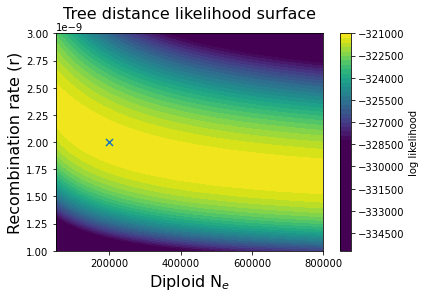

In [82]:
fig, _, _ = plot_likelihood_surface(
    gx, gy, gz.T,
    levels=50, 
    vmin=-gz.max() + (gz.max() - gz.min()) / 2,
    title="Tree distance likelihood surface");
#fig.savefig('../manuscript/figures/likelihood-surface-treedist-final.jpg')
#fig.savefig('../manuscript/figures/likelihood-surface-treedist-final.svg')

# Compare to when the MSC model is incorrect

What if we try to estimate parameters from genealogies generated under a 2-population model but fit to a single population model? This is analogous to when studying an organism with population structure but ignoring the structure. 

In [83]:
# embed genealogies into a single population model
single_pop = toytree.tree("(p);").set_node_data("Ne", default=200_000)
new_imap = {'p': sorted(set.union(*[set(i) for i in imap.values()]))}

In [85]:
bdata_tree = ipcoal.smc.likelihood.TreeEmbedding(single_pop, genealogies, imap=new_imap)

In [86]:
bdata_topo = ipcoal.smc.likelihood.TopologyEmbedding(single_pop, genealogies, imap=new_imap)

In [89]:
bcx, bcy, bcz = get_combined_likelihood_surface(
    min_neff=50_000, max_neff=800_000, n_values=41,
    min_recomb=1e-9, max_recomb=3e-9,
    tree_embedding=bdata_tree, 
    tree_lengths=tree_lengths,
    topo_embedding=bdata_topo,
    topo_lengths=topo_lengths,
)

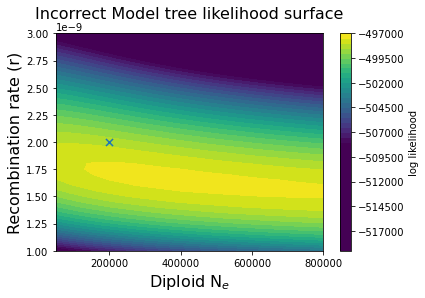

In [91]:
fig, _, _ = plot_likelihood_surface(
    bcx, bcy, bcz.T,
    levels=50,
    vmin=-bcz.max() + (bcz.max() - bcz.min()) / 2,
    title="Incorrect Model tree likelihood surface",
);
#fig.savefig('../manuscript/figures/likelihood-surface-treedist-incorrect-final.jpg')
#fig.savefig('../manuscript/figures/likelihood-surface-treedist-incorrect-final.svg')